In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sonar.all-data.csv')

In [3]:
df.head(10)

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [4]:
df['Label'].value_counts()

M    111
R     97
Name: Label, dtype: int64

In [5]:
df.shape

(208, 61)

<AxesSubplot:xlabel='Freq_1', ylabel='Freq_60'>

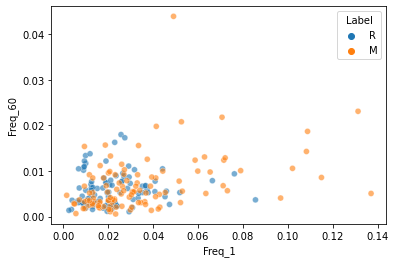

In [6]:
sns.scatterplot(x='Freq_1', y='Freq_60', data=df, hue = 'Label', alpha=0.6)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X = df.drop('Label', axis=1)
y = df['Label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
y_pred = knn_model.predict(scaled_X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
accuracy_score(y_test, y_pred)

0.9365079365079365

In [18]:
confusion_matrix(y_test, y_pred)

array([[32,  3],
       [ 1, 27]], dtype=int64)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.97      0.91      0.94        35
           R       0.90      0.96      0.93        28

    accuracy                           0.94        63
   macro avg       0.93      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



In [20]:
error_rate = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    error_rate.append(test_error)

Text(0, 0.5, 'Error rates')

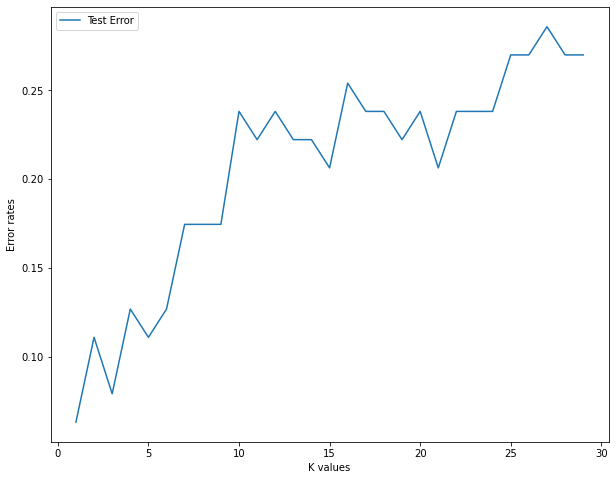

In [21]:
plt.figure(figsize=(10,8))

plt.plot(range(1,30), error_rate, label='Test Error')
plt.legend()
plt.xlabel('K values')
plt.ylabel('Error rates')

In [22]:
scaler = StandardScaler()

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [25]:

operations = [('scalar', scaler), ('knn', knn)]

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
pipe = Pipeline(operations)

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
k_values = list(range(1,20))

In [30]:
param_grid = {'knn__n_neighbors': k_values}

In [31]:
full_cv_classifier = GridSearchCV(pipe,param_grid, cv=5, scoring='accuracy')

In [32]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [33]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scalar', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scalar': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [34]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.79310345, 0.71724138, 0.73793103, 0.68275862, 0.68965517,
       0.68275862, 0.68275862, 0.67586207, 0.66896552, 0.67586207,
       0.68965517, 0.68275862, 0.67586207, 0.68275862, 0.68275862,
       0.65517241, 0.65517241, 0.67586207, 0.68275862])

In [35]:

scaler = StandardScaler()
knn14 = KNeighborsClassifier(n_neighbors=14)
operations = [('scalar', scaler), ('knn14', knn14)]

In [36]:
pipe = Pipeline(operations)

In [37]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [38]:
pipe_pred = pipe.predict(X_test)

In [39]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           M       0.76      0.89      0.82        35
           R       0.82      0.64      0.72        28

    accuracy                           0.78        63
   macro avg       0.79      0.76      0.77        63
weighted avg       0.78      0.78      0.77        63



In [40]:
new = [[0.0245,0.1254, 0.1256,0.0025,0.0021,0.0265,0.2561,0.2154,0.3215,0.3251,0.0245,0.1254, 0.1256,0.0025,0.0021,0.0265,0.2561,0.2154,0.3215,0.3251,0.0245,0.1254, 0.1256,0.0025,0.0021,0.0265,0.2561,0.2154,0.3215,0.3251,0.0245,0.1254, 0.1256,0.0025,0.0021,0.0265,0.2561,0.2154,0.3215,0.3251,0.0245,0.1254, 0.1256,0.0025,0.0021,0.0265,0.2561,0.2154,0.3215,0.3251,0.0245,0.1254, 0.1256,0.0025,0.0021,0.0265,0.2561,0.2154,0.3215,0.3251]]

In [41]:
pipe.predict(new)

array(['M'], dtype=object)